1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

Import libraries:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Create data path:

In [2]:
# Create data path
path = r"C:\Users\Jason\Instacart Basket Analysis"

In [3]:
# Importing new merged dataframe
df_customer_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
df_customer_ords_merged.shape

(32404859, 32)

In [5]:
df_customer_ords_merged.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Unnamed: 0,First Name,Surname,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

- For this step, I needed to review any data that could be used to identify a person from the dataset. To do this, I focused on the columns for the data to determine if any PII data was present.

In [6]:
# Reviewing the df for PII security implications
df_customer_ords_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'Unnamed: 0', 'First Name', 'Surname', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependents', 'Family Status',
       'Income'],
      dtype='object')

- In line with PII implications, I will remove; 'First Name', 'Surname'. The rest of the dataset contains general information about customers (demographics, gender, age, state) but I do not believe this is sensistive information that poses a risk.

In [7]:
# Hiding info that could be a security risk
df_customer_ords_merged_risk_free = df_customer_ords_merged.drop(columns=['First Name', 'Surname'])

In [8]:
df_customer_ords_merged_risk_free.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_between_orders,order_frequency_flag,Unnamed: 0,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.0,Regular customer,134862,Female,Alabama,31,2/17/2019,3,married,40423


3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). - https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [9]:
# Creating 'Region' column based on Wikipedia article
regions_USA = {
    # Northeast
    'Maine' : 'Northeast', 'New Hampshire' : 'Northeast', 'Vermont' : 'Northeast', 'Massachusetts' : 'Northeast', 'Rhode Island' : 'Northeast', 'Connecticut' : 'Northeast',
    'New York' : 'Northeast', 'Pennsylvania' : 'Northeast', 'New Jersey' : 'Northeast',
    # Midwest
    'Wisconsin' : 'Midwest', 'Michigan' : 'Midwest', 'Illinois' : 'Midwest', 'Indiana' : 'Midwest', 'Ohio' : 'Midwest', 'North Dakota' : 'Midwest', 'South Dakota' : 'Midwest', 'Nebraska' : 'Midwest',
    'Kansas' : 'Midwest', 'Minnesota' : 'Midwest', 'Iowa' : 'Midwest', 'Missouri' : 'Midwest',
    # South
    'Delaware' : 'South', 'Maryland' : 'South', 'District of Columbia' : 'South', 'Virginia' : 'South', 'West Virginia' : 'South', 'North Carolina' : 'South', 'South Carolina' : 'South', 'Georgia' : 'South',
    'Florida' : 'South', 'Kentucky' : 'South', 'Tennessee' : 'South', 'Mississippi' : 'South', 'Alabama' : 'South', 'Oklahoma' : 'South', 'Texas' : 'South', 'Arkansas' : 'South', 'Louisiana' : 'South',
    # West
    'Idaho' : 'West', 'Montana' : 'West', 'Wyoming' : 'West', 'Nevada' : 'West', 'Utah' : 'West', 'Colorado' : 'West', 'Arizona' : 'West', 'New Mexico' : 'West', 'Alaska' : 'West', 'Washington' : 'West', 'Oregon' : 'West',
    'California' : 'West', 'Hawaii' : 'West'
}

In [10]:
df = df_customer_ords_merged_risk_free

In [11]:
# Applying region changes
df['Region'] = df['State'].map(regions_USA)

In [12]:
# Reviewing output
df[['State', 'Region']].drop_duplicates().head(10)

,State,Region
0,Alabama,South
59,Alaska,West
254,Arizona,West
342,Arkansas,South
360,California,West
397,Colorado,West
411,Connecticut,Northeast
617,Delaware,South
666,District of Columbia,South
742,Florida,South


3. Determine whether there’s a difference in spending habits between the different U.S. regions.

- For this question, I decided to look at the total value counts per region and the 'order_frequency_flag'.
- My logic was;
  1. To get an understanding of the total value per regions.
  2. To figure out which region had the most frequent customers.

In [13]:
# Exploring counts by region
df['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

- We can that the South region of the USA has the most value counts regarding spending.
- The Northeast region of the USA has the lowest total customer count.

In [14]:
# Most frequent customers by region
frequent_customers_by_region = df.groupby(['Region', 'order_frequency_flag']).size()

In [15]:
# Most frequent customers by region
display(frequent_customers_by_region)

Region     order_frequency_flag 
Midwest    Frequent customer        5304364
           Non-frequent customer     640082
           Regular customer         1652879
Northeast  Frequent customer        4022241
           Non-frequent customer     469934
           Regular customer         1230561
South      Frequent customer        7601261
           Non-frequent customer     897977
           Regular customer         2292647
West       Frequent customer        5862657
           Non-frequent customer     678735
           Regular customer         1751521
dtype: int64

- We see that the South has the highest numbers of frequent customers also (7601261)
- Interestingly, frequent customers are the majority in all regions.

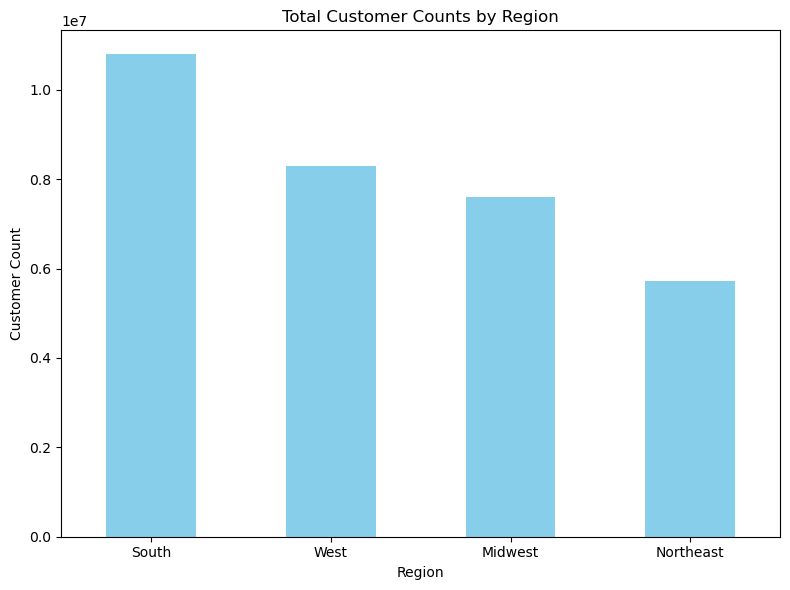

In [16]:
# Creating visualisations for results - Total Counts per Region
data = {
    'Region': ['South', 'West', 'Midwest', 'Northeast'],
    'Customer_Count': [10791885, 8292913, 7597325, 5722736]
}

df = df = pd.DataFrame(data)

import matplotlib.pyplot as plt3

# Plot
df.plot(kind='bar', x='Region', y='Customer_Count', legend=False, color='skyblue', figsize=(8, 6))
plt3.title('Total Customer Counts by Region')
plt3.ylabel('Customer Count')
plt3.xticks(rotation=0)
plt3.tight_layout()
plt3.show()

In [17]:
# Saving image
plt3.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'total_customers_by_region.png'))

<Figure size 640x480 with 0 Axes>

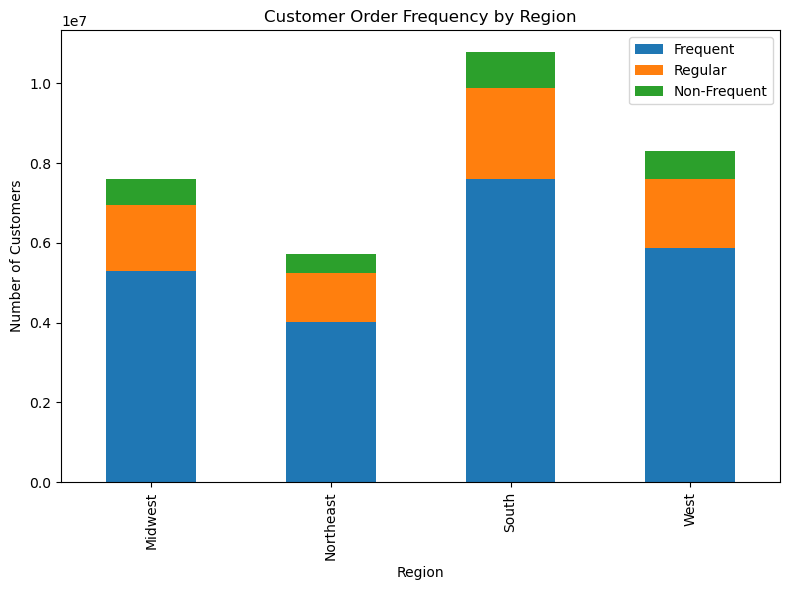

In [18]:
# Creating visualisations for results - Frequent Customers
data = {
    'Region': ['Midwest', 'Northeast', 'South', 'West'],
    'Frequent': [5304364, 4022241, 7601261, 5862657],
    'Regular': [1652879, 1230561, 2292647, 1751521],
    'Non-Frequent': [640082, 469934, 897977, 678735]
}

df = pd.DataFrame(data)
df.set_index('Region', inplace=True)

import matplotlib.pyplot as plt4

# Plot
df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt4.title('Customer Order Frequency by Region')
plt4.ylabel('Number of Customers')
plt4.tight_layout()
plt4.show()

In [19]:
# Saving image
plt4.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customer_frequency_by_region.png'))

<Figure size 640x480 with 0 Axes>

In [20]:
# Exporting PII checked df for future use
df_customer_ords_merged_risk_free.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customer_ords_merged_risk_free.pkl'))